In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import igraph
import itertools as itr
from src.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from mlxtend.evaluate import permutation_test 
from src.enm import igraph_network

In [102]:
g = nx.Graph()
edges = [(0,1),
        (0,2),
        #(1,2),
        (1,3),
        #(1,13),
        (3,4),
        (3,5),
        (2,10),
        (10,9),
        (10,11),
        (0,7),
        (7,8),
        (7,6)]
g.add_edges_from(edges)

In [177]:
target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)
target.add_edge(2,4)
target.add_edge(5,4)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


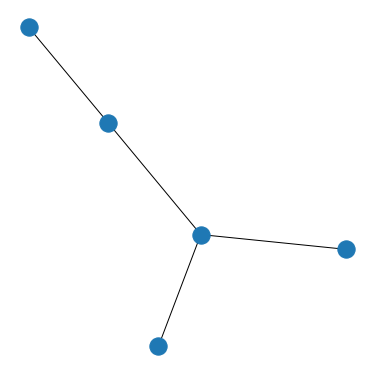

In [178]:
nx.draw(target)

In [149]:
#len([v for i,v in nx.degree(subg) if nx.degree(g)[i]==1])!=0

In [150]:
def get_graphlets(g, target):
    subg_list = []
    for sub_nodes in itr.combinations(g.nodes(),len(target.nodes())):
        subg = g.subgraph(sub_nodes)
        if nx.is_connected(subg) and nx.is_isomorphic(subg, target) and len(subg)-sum([True if nx.degree(g)[i]==v else False for i,v in nx.degree(subg) ]) <=1:
            subg_list.append(subg)
    return subg_list

In [152]:
def check_node_graphlet(grp, node):
    subg_with_node = []
    for i, subg in enumerate(grp):
        if len([n for n in subg.nodes if n==node])>0:
            subg_with_node.append(i)
        
    return subg_with_node

In [185]:
def map_nodes_to_graphlets(g,grp):
    subg_dict = {}
    for i in g.nodes:
        subg_dict[i] = check_node_graphlet(grp, i)
    df = pd.DataFrame({"name":[i for i in g.nodes], "data":[len(v) for i, v in subg_dict.items()]})
    return subg_dict, df

Above 3 function does following
- returns graphlets defined by target in network g
- finds graphlets with node in them
- does above for all nodes in the graph g and returns them

In [159]:
grp = get_graphlets(g,target)

In [186]:
map_nodes_to_graphlets(g,grp)

({0: [0, 1, 2, 3, 4],
  1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  2: [15, 16, 17],
  3: [],
  4: [15],
  5: [15, 16, 17],
  10: [],
  9: [],
  11: [16],
  7: [0, 5, 6, 7, 8],
  8: [15, 16, 17],
  6: [15, 16, 17]},
     name  data
 0      0     5
 1      1    15
 2      2     3
 3      3     0
 4      4     1
 5      5     3
 6     10     0
 7      9     0
 8     11     1
 9      7     5
 10     8     3
 11     6     3)

In [80]:
ba = nx.barabasi_albert_graph(20,1)

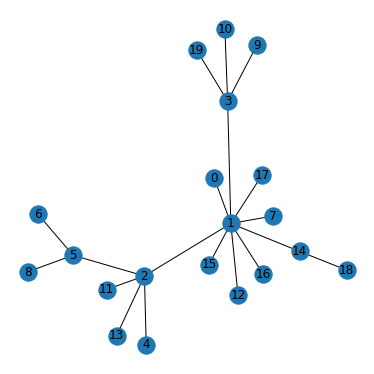

In [83]:
nx.draw(ba,with_labels=True)

In [184]:
[i.edges for i in grp]

[EdgeView([(0, 1), (1, 7), (1, 14), (14, 18)]),
 EdgeView([(0, 1), (1, 12), (1, 14), (14, 18)]),
 EdgeView([(0, 1), (1, 14), (1, 15), (14, 18)]),
 EdgeView([(0, 1), (1, 14), (1, 16), (14, 18)]),
 EdgeView([(0, 1), (1, 14), (1, 17), (14, 18)]),
 EdgeView([(1, 7), (1, 12), (1, 14), (14, 18)]),
 EdgeView([(1, 7), (1, 14), (1, 15), (14, 18)]),
 EdgeView([(1, 7), (1, 14), (1, 16), (14, 18)]),
 EdgeView([(1, 7), (1, 14), (1, 17), (14, 18)]),
 EdgeView([(1, 12), (1, 14), (1, 15), (14, 18)]),
 EdgeView([(1, 12), (1, 14), (1, 16), (14, 18)]),
 EdgeView([(1, 12), (1, 14), (1, 17), (14, 18)]),
 EdgeView([(1, 14), (1, 15), (1, 16), (14, 18)]),
 EdgeView([(1, 14), (1, 15), (1, 17), (14, 18)]),
 EdgeView([(1, 14), (1, 16), (1, 17), (14, 18)]),
 EdgeView([(2, 4), (2, 5), (5, 6), (5, 8)]),
 EdgeView([(2, 5), (2, 11), (5, 6), (5, 8)]),
 EdgeView([(2, 5), (2, 13), (5, 6), (5, 8)])]

In [179]:
grp = get_graphlets(ba,target)


In [189]:
dd, df = map_nodes_to_graphlets(ba,grp)